In [3]:
from snowpack_functions import make_map, mesh_gridify, unpack_netcdf_file_var
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import math 
%matplotlib inline 
from pylab import * 

lt = 20
rt = 14

variables = ["pr","temp"]
# variables = ["pr"]
chunks = ["1970-1999","2010-2039","2040-2069","2070-2099","1970-1999","2010-2039","2040-2069","2070-2099"] 
scenarios = ["historical","rcp45","rcp45","rcp45","historical","rcp85","rcp85","rcp85"] 
basins = ["california","cascades","northernrockies","southernrockies","whites"] 

# scenario = "historical"
# basin = "whites"

In [13]:
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("pr","california","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,pr_california = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("pr","cascades","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,pr_cascades = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("pr","northernrockies","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,pr_northernrockies = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("pr","southernrockies","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,pr_southernrockies = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("pr","whites","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
lons_mesh,lats_mesh,pr_whites = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))

direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("temp","california","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
print("average for historical california: %f" % np.mean(var_series))
lons_mesh,lats_mesh,temp_california = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
filename = '%s_%s_%s_%s.npz' %("temp","cascades","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
print("average for historical cascades: %f" % np.mean(var_series))
lons_mesh,lats_mesh,temp_cascades = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("temp","northernrockies","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
print("average for historical northern rockies: %f" % np.mean(var_series))
lons_mesh,lats_mesh,temp_northernrockies = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("temp","southernrockies","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
print("average for historical southern rockies: %f" % np.mean(var_series))
lons_mesh,lats_mesh,temp_southernrockies = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),var_series.reshape(len(lats_inc),1))
direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
filename = '%s_%s_%s_%s.npz' %("temp","whites","historical","1970-1999")
data = np.load(os.path.join(direc,filename))
lats_inc = data['lats']
lons_inc = data['lons']
var_series = data['var']
print("average for historical whites: %f" % np.mean(var_series))
lons_mesh,lats_mesh,temp_whites = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),
                                               var_series.reshape(len(lats_inc),1))

average for historical california: -1.063318
average for historical cascades: -1.761683
average for historical northern rockies: -6.147375
average for historical southern rockies: -6.197301
average for historical whites: -0.797977


average for pr california rcp45 2010-2039 is 4.588736
average for pr cascades rcp45 2010-2039 is 2.560517
average for pr northernrockies rcp45 2010-2039 is 4.213898
average for pr southernrockies rcp45 2010-2039 is 5.089116
average for pr whites rcp45 2010-2039 is -1.046796
average for pr california rcp45 2040-2069 is 3.508721
average for pr cascades rcp45 2040-2069 is 6.689211
average for pr northernrockies rcp45 2040-2069 is 8.508057
average for pr southernrockies rcp45 2040-2069 is 5.322222
average for pr whites rcp45 2040-2069 is -6.632119
average for pr california rcp45 2070-2099 is 5.902790
average for pr cascades rcp45 2070-2099 is 9.024019
average for pr northernrockies rcp45 2070-2099 is 12.033286
average for pr southernrockies rcp45 2070-2099 is 8.077479
average for pr whites rcp45 2070-2099 is -7.837143
average for pr california rcp85 2010-2039 is 4.572874
average for pr cascades rcp85 2010-2039 is 3.782782
average for pr northernrockies rcp85 2010-2039 is 5.068588
average f

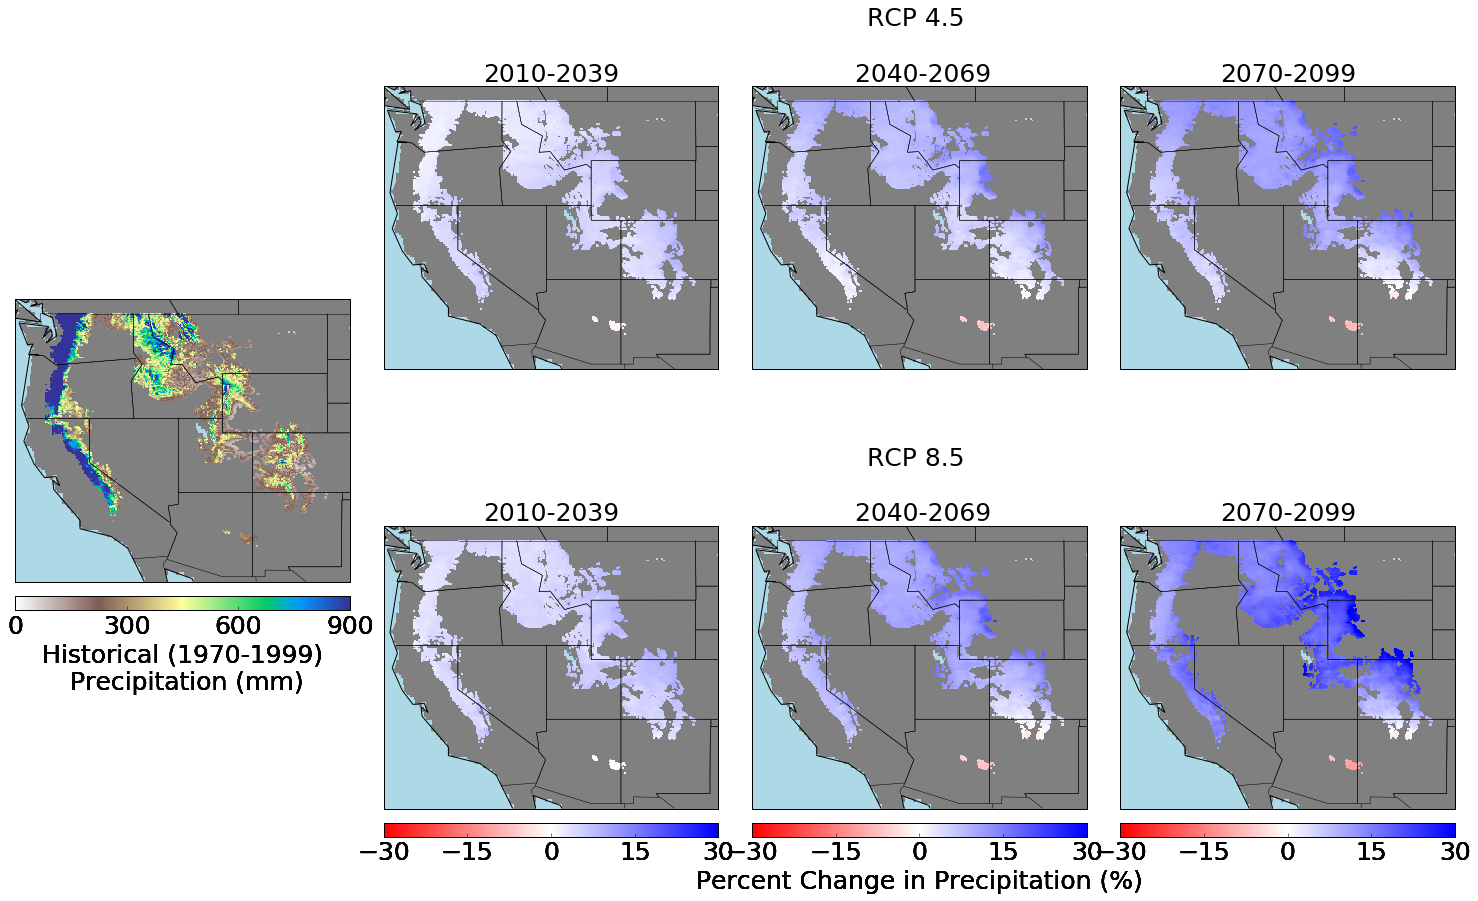

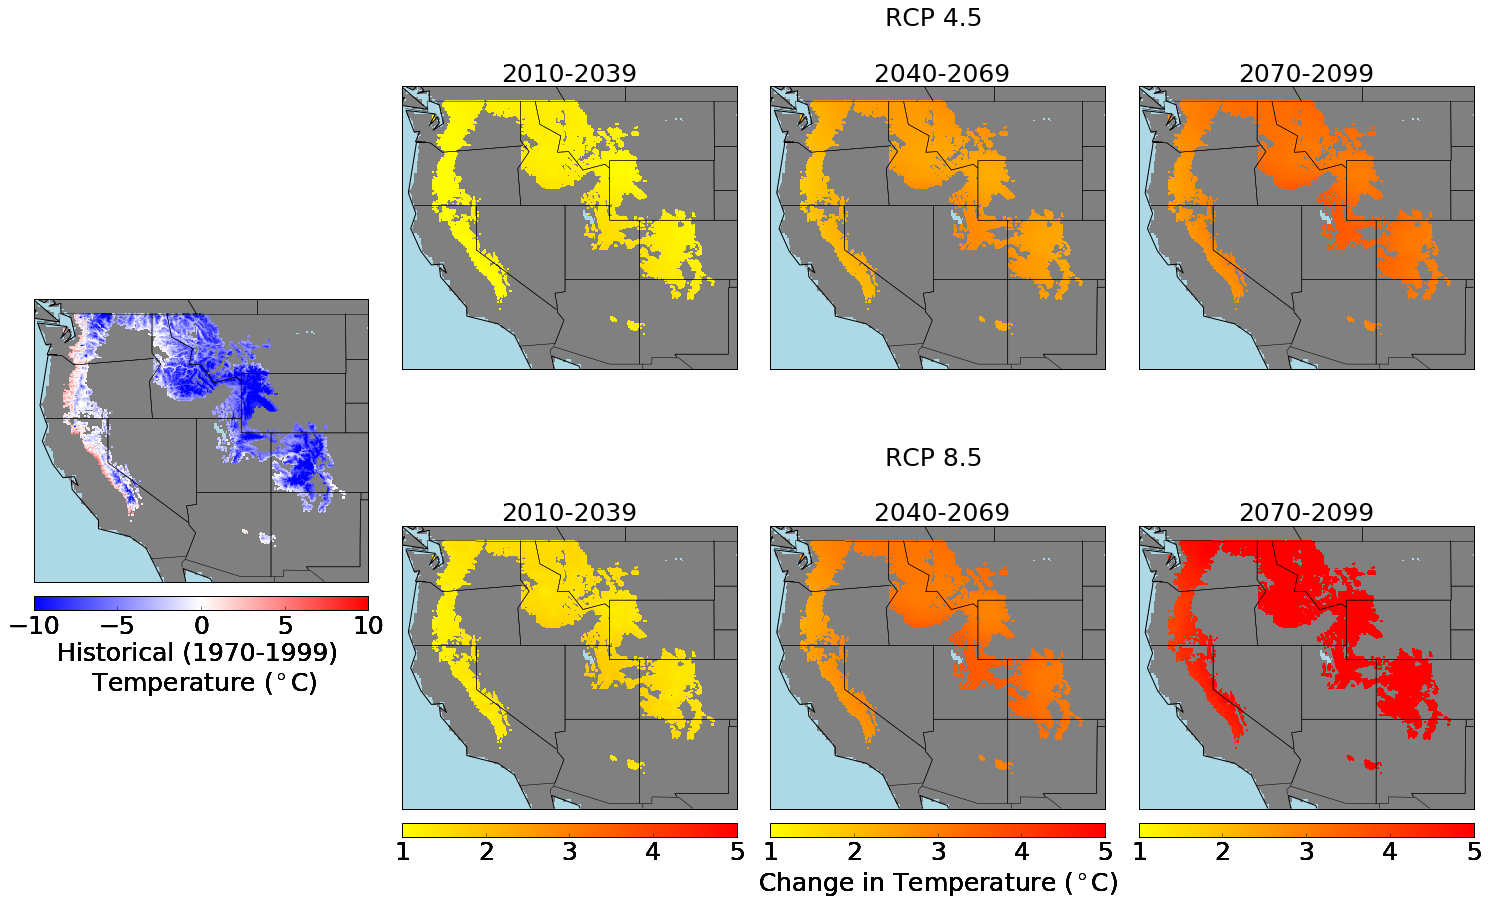

In [16]:
###################################################### MAKE FIGURE ###############################################################
## (10,7)
##### set fontsize
fs = 25
#####

from pylab import *
%matplotlib inline
from snowpack_functions import make_map
lt = 20
rt = 14
variables = ["pr","temp"]
# chunks = ["1970-1999","2010-2039","2040-2069","2070-2099","1970-1999","2010-2039","2040-2069","2070-2099"] 
chunks = ["2010-2039","2040-2069","2070-2099","2010-2039","2040-2069","2070-2099","1970-1999"] 
# scenarios = ["historical","rcp45","rcp45","rcp45","historical","rcp85","rcp85","rcp85"] 
scenarios = ["rcp45","rcp45","rcp45","rcp85","rcp85","rcp85","historical"] 
titles = ['2010-2039', 'RCP 4.5 \n \n 2040-2069', '2070-2099', '2010-2039', 'RCP 8.5 \n \n 2040-2069', 
         '2070-2099']
basins = ["california","cascades","northernrockies","southernrockies","whites"] 
sps = np.asarray([2,3,4,6,7,8,9])
for variable in variables: 
    fig = plt.figure(figsize=(lt,rt))
    for num in np.arange(len(chunks)):
        if sps[num] < 9: 
            ax = fig.add_subplot(2,4,sps[num])
        else: 
            ax = fig.add_subplot(1,4,1)
        m = make_map()
        if sps[num] < 9:
            ax.set_title(titles[num],fontsize=fs)
        for basin in basins: 
            if (scenarios[num] == "historical"):
                ## get data 
                direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
                filename = '%s_%s_%s_%s.npz' %(variable,basin,scenarios[num],chunks[num])
                data = np.load(os.path.join(direc,filename))
                lats_inc = data['lats']
                lons_inc = data['lons']
                var_series = data['var']
                lons_mesh,lats_mesh,data_mesh = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),
                                                             var_series.reshape(len(lats_inc),1)) 
                if (variable == "pr"):
                    cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='terrain_r',latlon=True,zorder=1,
                                      vmin=0,vmax=900)
                else: 
                    cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='bwr',latlon=True,zorder=1,
                                      vmin=-10,vmax=10)
            else: 
                ## get data 
                direc = '/raid9/gergel/agg_snowpack/climatology/arrays'
                filename = '%s_%s_%s_%s.npz' %(variable,basin,scenarios[num],chunks[num])
                data = np.load(os.path.join(direc,filename))
                lats_inc = data['lats']
                lons_inc = data['lons']
                var_series = data['var']
                lons_mesh,lats_mesh,data_mesh = mesh_gridify(lats_inc.reshape(len(lats_inc),1),lons_inc.reshape(len(lats_inc),1),
                                                             var_series.reshape(len(lats_inc),1)) 
                if (variable == "pr") and (basin == "california"):
                    data_mesh = np.divide(np.subtract(data_mesh,pr_california),pr_california)*100
                elif (variable == "pr") and (basin == "cascades"):
                    data_mesh = np.divide(np.subtract(data_mesh,pr_cascades),pr_cascades)*100
                elif (variable == "pr") and (basin == "northernrockies"):
                    data_mesh = np.divide(np.subtract(data_mesh,pr_northernrockies),pr_northernrockies)*100
                elif (variable == "pr") and (basin == "southernrockies"):
                    data_mesh = np.divide(np.subtract(data_mesh,pr_southernrockies),pr_southernrockies)*100
                elif (variable == "pr") and (basin == "whites"): 
                    data_mesh = np.divide(np.subtract(data_mesh,pr_whites),pr_whites)*100
                elif (variable == "temp") and (basin == "california"):
                    data_mesh = np.subtract(data_mesh,temp_california)
                elif (variable == "temp") and (basin == "cascades"):
                    data_mesh = np.subtract(data_mesh,temp_cascades)
                elif (variable == "temp") and (basin == "northernrockies"):
                    data_mesh = np.subtract(data_mesh,temp_northernrockies)
                elif (variable == "temp") and (basin == "southernrockies"):
                    data_mesh = np.subtract(data_mesh,temp_southernrockies)
                else: 
                    data_mesh = np.subtract(data_mesh,temp_whites)
                if (variable == "pr"):
                    cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='bwr_r',latlon=True,zorder=1,
                                      vmin=-30,vmax=30)
                else: 
                    cs = m.pcolormesh(lons_mesh,lats_mesh,data_mesh,shading='flat',cmap='autumn_r',latlon=True,
                                      zorder=1,vmin=1,vmax=5)
            if num >= 3 and num < 8:
                cbar = m.colorbar(cs, location='bottom',pad="5%")
                if (scenarios[num] == "historical") and (variable == "pr"):
                    cbar.set_ticks([0,300,600,900])
                    cbar.ax.tick_params(labelsize=fs)
                    cbar.set_label(' Historical (1970-1999) \n Precipitation (mm)',size=fs)
                elif (scenarios[num] == "historical") and (variable == "temp"):
                    cbar.set_ticks([-10,-5,0,5,10])
                    cbar.ax.tick_params(labelsize=fs)
                    cbar.set_label('Historical (1970-1999) \n Temperature ($^\circ$C)',size=fs)
                elif(scenarios[num] != "historical") and (variable == "pr"): 
                    cbar.set_ticks([-30,-15,0,15,30])
                    cbar.ax.tick_params(labelsize=fs) 
                else: 
                    cbar.set_ticks([1,2,3,4,5])
                    cbar.ax.tick_params(labelsize=fs)
                    
            if num == 4 and (variable == "temp"):
                cbar.set_label('Change in Temperature ($^\circ$C)',size=fs)
            elif num == 4 and (variable == "pr"):
                cbar.set_label('Percent Change in Precipitation (%)',size=fs)
                
            print("average for %s %s %s %s is %f" % (variable, basin, scenarios[num], chunks[num], np.mean(data_mesh)))
                
    fig.subplots_adjust(left=0,right=1,top=1,bottom=0.1,hspace=0.00000001,wspace=0.1)
    ## save figure
    direc = '/raid9/gergel/agg_snowpack/climatology/plots'
    plotname = '%s' %variable 
    savepath = os.path.join(direc,plotname)
    print("saving figure to %s" %savepath)
    plt.savefig(savepath,dpi=150)